# 6. Which country has produced the most successful tennis players? 
#### prize approach

In [1]:
import pandas as pd
MatchHomeTeamInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchHomeTeamInfo.csv")
MatchAwayTeamInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchAwayTeamInfo.csv")

# Combine MatchHomeTeamInfo and MatchAwayTeamInfo to aggregate data
combined_teams = pd.concat([MatchHomeTeamInfo, MatchAwayTeamInfo], ignore_index=True)

# Group by country and sum the total prize money
total_prize_per_country = combined_teams.groupby('country')['total_prize'].sum()
# Find the country with the highest total prize money earned
most_successful_country = total_prize_per_country.idxmax()
max_total_prize = total_prize_per_country.max()

# Print the result
print(f"The country that has produced the most successful tennis players based on total prize money earned is {most_successful_country} with total prize money of ${max_total_prize}.")

The country that has produced the most successful tennis players based on total prize money earned is Serbia with total prize money of $2864742758.0.


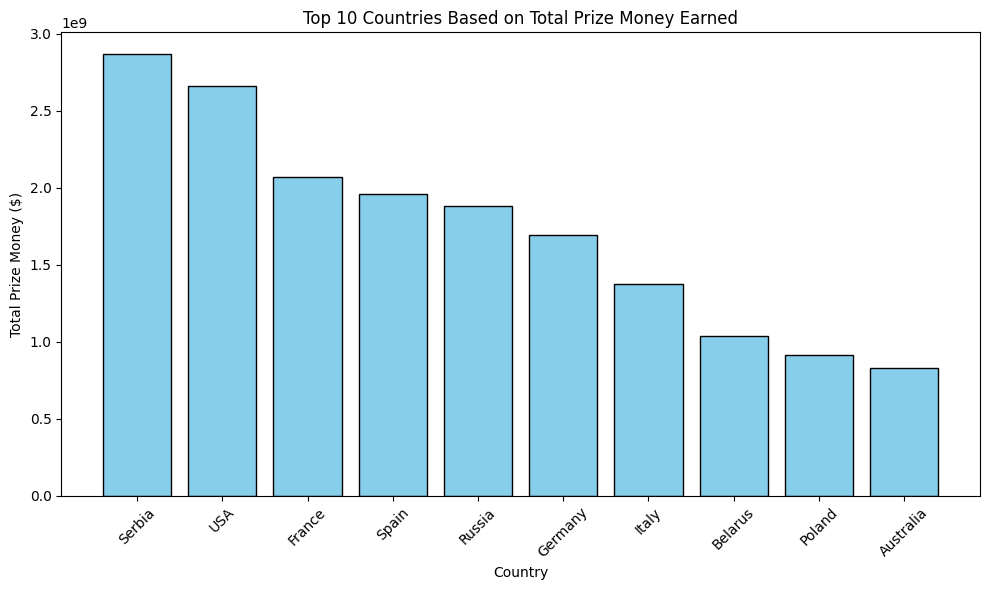

In [2]:
import matplotlib.pyplot as plt

# Sort by total prize in descending order and select top 10 countries
top_10_countries = total_prize_per_country.sort_values( ascending=False).head(10)
top_10_countries = top_10_countries.reset_index()

# Plotting the top 10 countries based on total prize money
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['country'], top_10_countries['total_prize'], color='skyblue', edgecolor='black')
plt.title('Top 10 Countries Based on Total Prize Money Earned')
plt.xlabel('Country')
plt.ylabel('Total Prize Money ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Which country has produced the most successful tennis players? 
#### wins approach

In [4]:
MatchEventInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchEventInfo.csv")

# Merge MatchEventInfo with MatchHomeTeamInfo and MatchAwayTeamInfo to get player IDs
merged_df_country = MatchEventInfo[['match_id', 'winner_code']].merge(MatchHomeTeamInfo[['match_id', 'player_id' , 'country']], on='match_id', suffixes=('', '_home'))
merged_df_country = merged_df_country.merge(MatchAwayTeamInfo[['match_id', 'player_id' , 'country']], on='match_id', suffixes=('', '_away')).drop_duplicates(subset="match_id")
# Map winner_code to actual player_id
merged_df_country['winner_id'] = merged_df_country.apply(
    lambda row: row['player_id'] if row['winner_code'] == 1.0 else row['player_id_away'], 
    axis=1
)
merged_df_country = merged_df_country.rename (columns={'player_id':'player_id_home' , 'country':'country_home'})

# Calculate win counts based on countries
win_counts_home = merged_df_country.loc[merged_df_country['winner_id'] == merged_df_country["player_id_home"], 'country_home'].value_counts()
win_counts_away = merged_df_country.loc[merged_df_country['winner_id'] == merged_df_country["player_id_away"], 'country_away'].value_counts()


# # Combine and sum win counts for each country
win_counts = win_counts_home.add(win_counts_away, fill_value=0).astype(int)
max_wins_country = win_counts.idxmax()
max_wins_count = win_counts.max()


print(f"\nThe country with the maximum wins is {max_wins_country} with {max_wins_count} wins.")


The country with the maximum wins is USA with 422 wins.


In [ ]:
win_counts ["Serbia"]

117

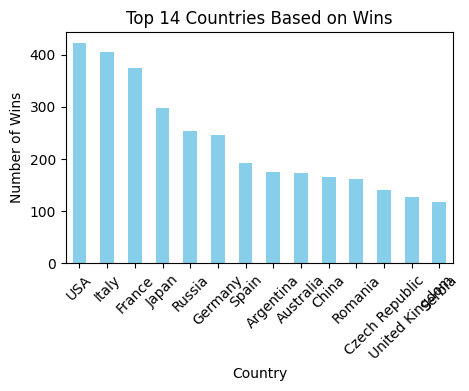

In [5]:
top_10_countries = win_counts.nlargest(14)

plt.figure(figsize=(5, 3))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 14 Countries Based on Wins')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()